## Model

We look at the Stochastic Volatility model

$\alpha_{t} = a \cdot \alpha_{t-1} + s \cdot \eta_t$

$y_{t} = b \exp(- \alpha_t/2) \varepsilon_t$

where $\eta_t$ and $\varepsilon_t$ are two sequences of independet standard Gaussian noise. We also let $\alpha_1$ be a draw from the standard Gaussian distribution.

**E0:** Simulate 250 steps of this model using $a = 0.7$, $s^2 = 0.9$ and $b^2=0.1$

In [95]:
import pandas  # Loading data / handling data frames
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)  # Increase default size of plots

In [96]:
a = 0.7
s2 = 0.9
b2 = 0.1
np.random.seed(0)
## simulate 250 steps
alpha = np.zeros((250))
alpha[0] = np.random.randn(1)
y = np.zeros((250))

for t in range(250-1):
    alpha[t+1] = a*alpha[t]+np.sqrt(s2)* np.random.randn(1)
    y[t] = np.sqrt(b2)*np.exp(-alpha[t+1]/2)*np.random.randn(1)                                            

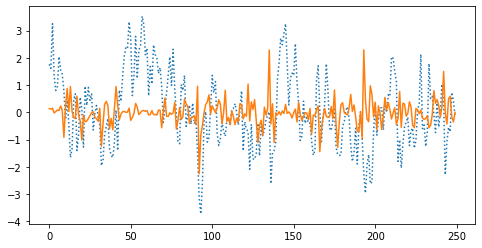

In [35]:
plt.plot(np.arange(250), alpha,":")
plt.plot(np.arange(250),y)

**E1:** For the bootstrap particle filter we need to calculate the weighting function. What will it be in this case?

In [97]:
def logwgtfun(alpha,y,b2):
    logwgt = -0.5*(y**2)/b2*np.exp(-alpha) - 0.5*np.log(2*np.pi*b2*np.exp(-alpha))
    return logwgt

**E2:** Implement the Bootstrap Particle filter for this data.

$\ell = \sum_{t=1}^{n} \log(1/N \sum_{i=1}^{N} \omega_t^i)$

In [98]:
N =100
n =250
# draw particle FOR INIT
particle = np.zeros((n,N))
particle[0,:] = np.random.randn(N)

# set wgt
logwgt = np.zeros((n,N))
logwgt[0,:] =logwgtfun(part[0,:],y[0],b2)

wgt = np.zeros((n,N))

llh = 0

#### BPF

for t in range(N):
    wgt[t,:] =  np.exp(logwgt[t,:])
    wgtsum = np.sum(wgt[t,:])
    
    #draw ind for bootstrap
    prob = wgt[t,:]/wgtsum
    ind = np.random.choice(N, size=N , replace=True, p = prob)
    
    #draw particle from q fun
    particle[t+1,:] = a*particle[t,ind] + np.sqrt(s2)*np.random.randn(1)
   
    #update weight
    logwgt[t+1,] = logwgtfun(particle[t+1,:], y[t+1], b2)
    
    #llh est.
    llh = llh + (wgtsum/N) #mean of wgt
    
    
wgt[-1,:] = np.exp(logwgt[-1,:])
wgtsum = np.sum(wgt[-1,:])
wgt[-1,:] = wgt[-1,:]/wgtsum
llh = llh + np.log(wgtsum/N)  

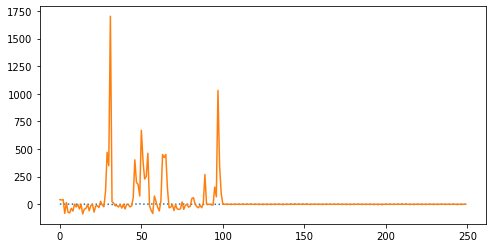

In [100]:
## est
#alpha_filt[:, 0, t] = particles[:,:,t]@W[0,:,t]/np.sum(W[0,:,t])
#est = np.sum(part*wgt,axis=1)
wgt[-1,:] = np.exp(logwgt[-1,:])
wgtsum = np.sum(wgt[-1,:])
wgt[-1,:] = wgt[-1,:]/wgtsum

alpha_filt = np.sum(particle*wgt, axis=1)

plt.plot(np.arange(250), alpha,":")
plt.plot(np.arange(250),alpha_filt)

In [74]:
particle.shape

(250, 100)

In [75]:
logwgt.shape

(250, 100)

In [89]:
a = np.array([1,2,3])
a[-1]

3